In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
data = pd.read_csv("D:\WidiPythonEnv\Machine-Learning/5210411135\data\data-uts.csv", sep=';')
print(data.head(10))
print(data.isna().sum())

   Gender   Age  AnnualSalary Purchased
0    Male  35.0       20000.0        No
1    Male  40.0       43500.0        No
2    Male  49.0       74000.0        No
3    Male  40.0      107500.0       Yes
4    Male  25.0       79000.0        No
5  Female  47.0       33500.0       Yes
6     NaN  46.0      132500.0       Yes
7    Male  42.0           NaN        No
8  Female  30.0       84500.0        No
9    Male   NaN       52000.0        No
Gender          2
Age             2
AnnualSalary    2
Purchased       1
dtype: int64


In [8]:
datanan = data.loc[data.isnull().any(axis=1)]
datanan

,Gender,Age,AnnualSalary,Purchased
6,NaN,46.0,132500.0,Yes
7,Male,42.0,NaN,No
9,Male,NaN,52000.0,No
11,Male,47.0,23000.0,NaN
13,NaN,27.0,57000.0,No
15,Female,NaN,149000.0,Yes
17,Male,35.0,NaN,No


In [9]:
data.loc[6, 'Gender'] = 'Female'
data.loc[13, 'Gender'] = 'Female'

data['Age'].fillna(25, inplace=True)
data['Purchased'].fillna('Yes', inplace=True)

nominal = data[['AnnualSalary']].values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(nominal)
nominal = imp.transform(nominal)
data[['AnnualSalary']] = nominal

data.isna().sum()

Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

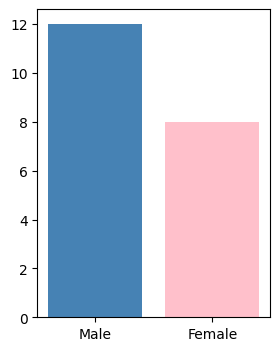

In [10]:
colors = ['steelblue', 'pink']
fig = plt.figure(figsize=(3,4))
lb_gender = list(data['Gender'].unique())
v_gender = list(data['Gender'].value_counts())
plt.bar(lb_gender, v_gender, color=colors)
plt.show()

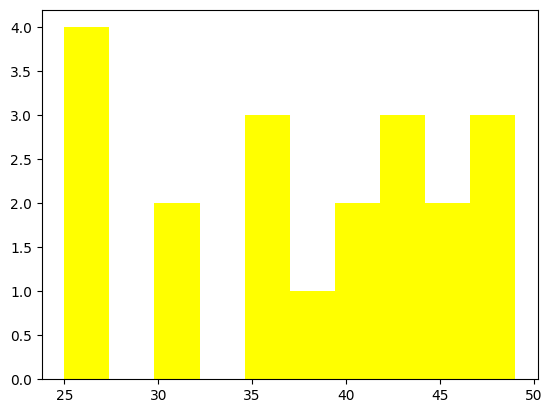

In [11]:
plt.hist(data['Age'], color='yellow')
plt.show()

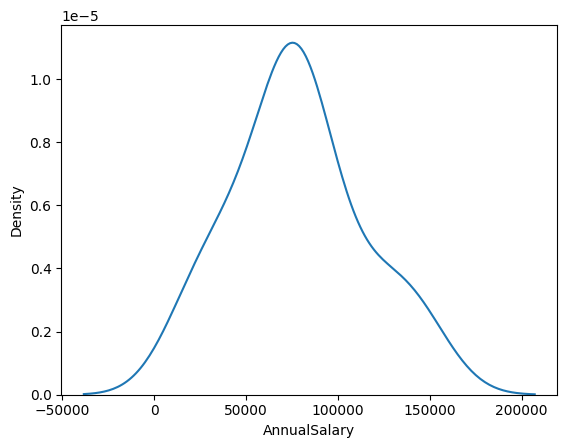

In [12]:
sns.kdeplot(data=data, x='AnnualSalary')
plt.show()

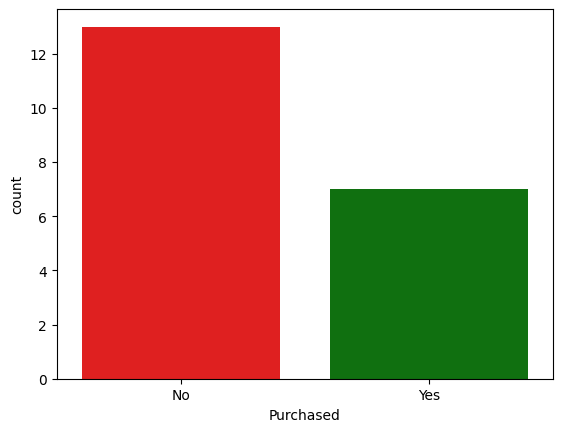

In [13]:
sns.countplot(data=data, x='Purchased', palette=['red', 'green'])
plt.show()

In [14]:
lbenc = LabelEncoder()
for i in data.columns.values:
    if data[i].dtypes == 'object':
        data[i] = lbenc.fit_transform(data[i])

data.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35.0,20000.0,0
1,1,40.0,43500.0,0
2,1,49.0,74000.0,0
3,1,40.0,107500.0,1
4,1,25.0,79000.0,0


In [15]:
lb_y = data.iloc[:,-1].values
ft_x = data.iloc[:,0:3].values

# split
x_train, x_test, y_train, y_test = train_test_split(ft_x,
                                                    lb_y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=False)

dimensi = f'dimensi awal\t: {data.shape}\ndimensi x_train\t: {x_train.shape}\ndimensi x_test\t: {x_test.shape}\ndimensi y_train\t: {y_train.shape}\ndimensi y_test\t: {y_test.shape}\n'
print(dimensi)

dimensi awal	: (20, 4)
dimensi x_train	: (14, 3)
dimensi x_test	: (6, 3)
dimensi y_train	: (14,)
dimensi y_test	: (6,)



In [16]:
k = 4
knn = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

In [17]:
y_predict = knn.predict(x_test)
metrics.accuracy_score(y_test, y_predict)

0.5

In [18]:
print(y_test)
print(y_predict)

[1 1 0 0 1 0]
[0 0 0 0 0 0]


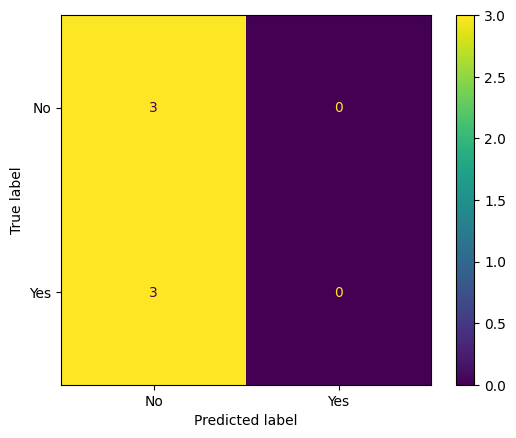

In [19]:
cm = metrics.confusion_matrix(y_test,y_predict)
disp_cm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp_cm.plot()
plt.show()